In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
final_table = pd.read_csv('../../data/old/final_table_proposal.csv')
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None) 
display(final_table.head()) 
print("Rows:",len(final_table))
print("Columns: ",len(final_table.columns))

,Unnamed: 0,id_accident,day,month,year,lighting_condition,department_code,commune_code,location,intersection,weather_condition,type_of_collision,postal_address,latitude,longitude,hour,minute,road_category,road_number,road_number_index,road_number_letter,traffic_regime,number_of_traffic_lanes,reserved_lane_present,longitudinal_profile,nearest_reference_marker,nearest_reference_marker_distance,horizontal_alignment,width_central_reservation,carriageway_width,pavement_condition,infrastructure,accident_situation,speed_limit,id_user,id_vehicle,position,user_category,injury_severity,sex,trip_purpose,pedestrian_location,pedestrian_action,injured_pedestrian_alone,role,age,used_belt,used_helmet,used_child_restraint,used_reflective_vest,used_airbag,used_gloves,used_gloves_and_airbag,used_other,number_vehicle,direction_of_travel,vehicle_category,fixed_obstacle_struck,mobile_obstacle_struck,initial_point_of_impact,main_maneuver_before_accident,motor_type,number_occupants_in_public_transport,impact_score,id_vehicle_other,number_vehicle_other,direction_of_travel_other,vehicle_category_other,fixed_obstacle_struck_other,mobile_obstacle_struck_other,initial_point_of_impact_other,main_maneuver_before_accident_other,motor_type_other,number_occupants_in_public_transport_other,impact_score_other,vehicle_category_involved_bicycle,vehicle_category_involved_bus_coach,vehicle_category_involved_hgv_truck,vehicle_category_involved_light_motor_vehicle,vehicle_category_involved_other,vehicle_category_involved_powered_2_3_wheeler
0,0,202300000001,7,5,2023,1,75,75101,2,4,2,7,RUE DE RIVOLI,48.866386,2.323471,6,0,4,RUE SAINT FLORENTIN,0,NaN,1,1,0,1,-1,-1,1,NaN,-1.0,2,0,1,30,203851184,155680557.0,1,1,4,1,5,-1,-1,-1,driver,45.0,0,1,0,0,0,0,0,0,A01,1.0,powered_2_3_wheeler,0.0,0.0,5.0,1.0,1.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,1
1,1,202300000002,7,5,2023,5,94,94080,2,1,3,6,Avenue de Paris,48.845478,2.428681,5,30,3,120,0,NaN,2,3,2,1,-1,-1,1,NaN,-1.0,2,0,1,50,203851182,155680556.0,1,1,1,2,9,-1,-1,-1,driver,26.0,1,0,0,0,0,0,0,0,A01,2.0,light_motor_vehicle,0.0,1.0,1.0,1.0,1.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0
2,2,202300000002,7,5,2023,5,94,94080,2,1,3,6,Avenue de Paris,48.845478,2.428681,5,30,3,120,0,NaN,2,3,2,1,-1,-1,1,NaN,-1.0,2,0,1,50,203851183,NaN,10,3,3,1,9,2,3,1,pedestrian,26.0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,155680556.0,A01,2.0,light_motor_vehicle,0.0,1.0,1.0,1.0,1.0,NaN,4.0,0,0,0,1,0,0
3,3,202300000003,7,5,2023,1,94,94022,2,3,2,1,Avenue du Général Leclerc,48.762400,2.406550,20,50,3,87,0,NaN,2,4,0,1,1,0,1,NaN,-1.0,2,5,1,50,203851180,155680554.0,1,1,3,1,0,0,0,-1,driver,36.0,0,1,0,0,0,1,0,0,B01,1.0,powered_2_3_wheeler,0.0,2.0,1.0,16.0,1.0,NaN,3.0,155680555.0,A01,2.0,light_motor_vehicle,0.0,2.0,2.0,15.0,1.0,NaN,4.0,0,0,0,1,0,1
4,4,202300000003,7,5,2023,1,94,94022,2,3,2,1,Avenue du Général Leclerc,48.762400,2.406550,20,50,3,87,0,NaN,2,4,0,1,1,0,1,NaN,-1.0,2,5,1,50,203851181,155680555.0,1,1,1,2,0,0,0,-1,driver,39.0,1,0,0,0,0,0,0,0,A01,2.0,light_motor_vehicle,0.0,2.0,2.0,15.0,1.0,NaN,4.0,155680554.0,B01,1.0,powered_2_3_wheeler,0.0,2.0,1.0,16.0,1.0,NaN,3.0,0,0,0,1,0,1


Rows: 125789
Columns:  81


In [3]:
# First, look at columns regarding circumstances and persons
cols_general = final_table.iloc[:, 29:54]
display(cols_general.head())

,carriageway_width,pavement_condition,infrastructure,accident_situation,speed_limit,id_user,id_vehicle,position,user_category,injury_severity,sex,trip_purpose,pedestrian_location,pedestrian_action,injured_pedestrian_alone,role,age,used_belt,used_helmet,used_child_restraint,used_reflective_vest,used_airbag,used_gloves,used_gloves_and_airbag,used_other
0,-1.0,2,0,1,30,203851184,155680557.0,1,1,4,1,5,-1,-1,-1,driver,45.0,0,1,0,0,0,0,0,0
1,-1.0,2,0,1,50,203851182,155680556.0,1,1,1,2,9,-1,-1,-1,driver,26.0,1,0,0,0,0,0,0,0
2,-1.0,2,0,1,50,203851183,NaN,10,3,3,1,9,2,3,1,pedestrian,26.0,0,0,0,0,0,0,0,0
3,-1.0,2,5,1,50,203851180,155680554.0,1,1,3,1,0,0,0,-1,driver,36.0,0,1,0,0,0,1,0,0
4,-1.0,2,5,1,50,203851181,155680555.0,1,1,1,2,0,0,0,-1,driver,39.0,1,0,0,0,0,0,0,0


In [4]:
info = pd.DataFrame({
    'Column': cols_general.columns,
    'Data Type': [cols_general[col].dtype for col in cols_general.columns],
    'Missing %': [f"{cols_general[col].isna().sum() / len(cols_general) * 100}%" for col in cols_general.columns],
    'Unique Values': [cols_general[col].nunique() for col in cols_general.columns]
})
info

,Column,Data Type,Missing %,Unique Values
0,carriageway_width,float64,0.0%,103
1,pavement_condition,int64,0.0%,10
2,infrastructure,int64,0.0%,11
3,accident_situation,int64,0.0%,8
4,speed_limit,int64,0.0%,21
5,id_user,int64,0.0%,125789
6,id_vehicle,float64,7.569024318501618%,93482
7,position,int64,0.0%,11
8,user_category,int64,0.0%,3
9,injury_severity,int64,0.0%,5


In [5]:
# Drop columns
final_table.drop([
    'carriageway_width',
    'id_vehicle',
    'id_user',
    'trip_purpose', # impossible to tell from a neutral perspective
    'used_gloves',
    'used_gloves_and_airbag',
    'used_other'
    ], axis=1, inplace=True)

In [6]:
cols_of_interest = cols_general.columns.intersection(final_table.columns)

for col in cols_of_interest:
    print(f"{col}:\n{final_table[col].value_counts(dropna=False)}\n")

pavement_condition:
 1    99717
 2    24735
 9      456
 7      240
 3      203
 5      158
 8      147
 6       74
 4       51
-1        8
Name: pavement_condition, dtype: int64

infrastructure:
 0    105918
 5      6367
 9      4366
 2      2257
 1      1554
 3      1502
 6      1325
 8      1008
-1       944
 4       425
 7       123
Name: infrastructure, dtype: int64

accident_situation:
 1    107860
 3      6657
 8      3980
 5      2721
 4      2308
 6      1526
 2       730
-1         7
Name: accident_situation, dtype: int64

speed_limit:
 50     55854
 30     19399
 80     16858
 90     11797
 70      9854
 110     5469
 130     3439
-1       2150
 20       369
 60       283
 40       121
 25       115
 45        26
 100       24
 10        11
 15         6
 75         3
 31         3
 65         3
 23         3
 35         2
Name: speed_limit, dtype: int64

position:
 1     93440
 2     14060
 10     9521
 3      2420
 4      2271
 9      1308
 7      1218
 5       764
 8     

Ideas:
Drop pedestiran_action and pedestrian_location, 

Drop -1 values for injury_severity, sex, position, accident_situation, infrastructure, pavement condition

What is the -1 for Speed_limit? Is it none or unknown?

In [7]:
for col in ['injury_severity', 'sex', 'position', 'accident_situation', 'infrastructure', 'pavement_condition']:
    final_table = final_table[final_table[col]!=-1]

for col in cols_of_interest:
    print(f"{col}:\n{final_table[col].value_counts(dropna=False)}\n")

pavement_condition:
1    97004
2    24106
9      452
7      239
3      202
5      155
8      146
6       74
4       50
Name: pavement_condition, dtype: int64

infrastructure:
0    103868
5      6267
9      4277
2      2214
1      1513
3      1486
6      1264
8       994
4       423
7       122
Name: infrastructure, dtype: int64

accident_situation:
1    105347
3      6622
8      3891
5      2331
4      2236
6      1279
2       722
Name: accident_situation, dtype: int64

speed_limit:
 50     54222
 30     18311
 80     16753
 90     11640
 70      9685
 110     5380
 130     3415
-1       2102
 20       345
 60       275
 40       121
 25       101
 45        26
 100       24
 10        11
 15         6
 75         3
 31         3
 23         3
 65         2
Name: speed_limit, dtype: int64

position:
1     90322
2     13999
10     9395
3      2403
4      2259
9      1307
7      1214
5       756
8       572
6       201
Name: position, dtype: int64

user_category:
1    90344
2    22689
3 

count    122256.000000
mean         38.738491
std          19.109743
min           0.000000
25%          23.000000
50%          35.000000
75%          52.000000
max         110.000000
Name: age, dtype: float64


<AxesSubplot:xlabel='age', ylabel='Count'>

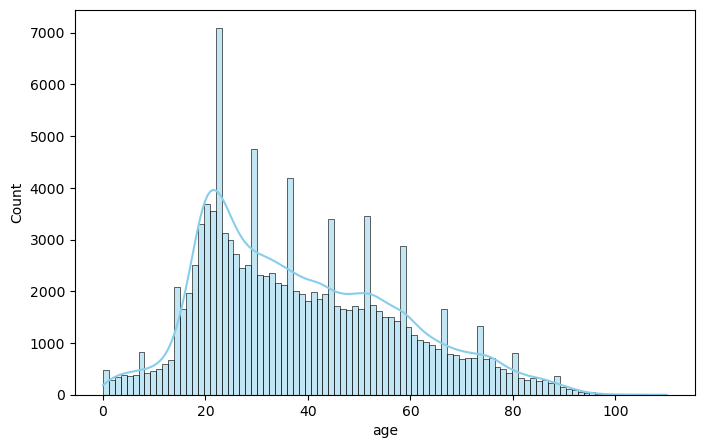

In [8]:
# Look at column "Age" in-depth
print(final_table['age'].describe())

plt.figure(figsize=(8,5))
sns.histplot(final_table['age'], kde=True, color='skyblue')

Number of NaNs:  0.0
count    122428.000000
mean         38.736882
std          19.108356
min           0.000000
25%          23.000000
50%          35.000000
75%          52.000000
max         110.000000
Name: age, dtype: float64


<AxesSubplot:xlabel='age', ylabel='Count'>

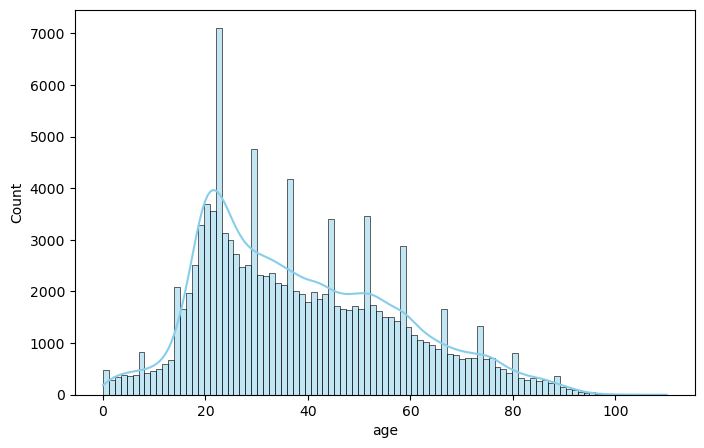

In [9]:
# Set random seed for reproducibility
np.random.seed(42)

# Impute missing ages by random sampling from existing non-null ages
final_table['age'] = final_table['age'].apply(
    lambda x: np.random.choice(final_table['age'].dropna()) if pd.isnull(x) else x
)

# Adjust column data type
final_table['age'] = final_table['age'].astype(int)

# Check if it worked as expected
print("Number of NaNs: ", final_table['age'].isna().sum() / len(final_table) * 100)
print(final_table['age'].describe())

plt.figure(figsize=(8,5))
sns.histplot(final_table['age'], kde=True, color='skyblue')


In [10]:
# Now look at vehicle data

cols_vehicle = final_table.iloc[:, 47:57]
display(cols_vehicle.head())

,number_vehicle,direction_of_travel,vehicle_category,fixed_obstacle_struck,mobile_obstacle_struck,initial_point_of_impact,main_maneuver_before_accident,motor_type,number_occupants_in_public_transport,impact_score
0,A01,1.0,powered_2_3_wheeler,0.0,0.0,5.0,1.0,1.0,NaN,3.0
1,A01,2.0,light_motor_vehicle,0.0,1.0,1.0,1.0,1.0,NaN,4.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B01,1.0,powered_2_3_wheeler,0.0,2.0,1.0,16.0,1.0,NaN,3.0
4,A01,2.0,light_motor_vehicle,0.0,2.0,2.0,15.0,1.0,NaN,4.0


In [11]:
info = pd.DataFrame({
    'Column': cols_vehicle.columns,
    'Data Type': [cols_vehicle[col].dtype for col in cols_vehicle.columns],
    'Missing %': [f"{cols_vehicle[col].isna().sum() / len(cols_vehicle) * 100}%" for col in cols_vehicle.columns],
    'Unique Values': [cols_vehicle[col].nunique() for col in cols_vehicle.columns]
})
info

,Column,Data Type,Missing %,Unique Values
0,number_vehicle,object,7.6738981278792435%,44
1,direction_of_travel,float64,7.766197275133139%,4
2,vehicle_category,object,7.675531741104975%,6
3,fixed_obstacle_struck,float64,7.713921651909694%,18
4,mobile_obstacle_struck,float64,7.707387199006763%,7
5,initial_point_of_impact,float64,7.713921651909694%,10
6,main_maneuver_before_accident,float64,7.699219132878101%,27
7,motor_type,float64,7.793151893357729%,7
8,number_occupants_in_public_transport,float64,98.61878001764303%,26
9,impact_score,float64,7.6738981278792435%,6


In [12]:
# Drop columns
final_table.drop([
    'number_vehicle',
    'direction_of_travel',
    'number_occupants_in_public_transport',
    ], axis=1, inplace=True)

In [13]:
cols_of_interest = cols_vehicle.columns.intersection(final_table.columns)

for col in cols_of_interest:
    print(f"{col}:\n{final_table[col].value_counts(dropna=False)}\n")

vehicle_category:
light_motor_vehicle    78299
powered_2_3_wheeler    20045
NaN                     9397
bicycle                 5691
other                   4610
hgv_truck               2695
bus_coach               1691
Name: vehicle_category, dtype: int64

fixed_obstacle_struck:
0.0     93256
NaN      9444
1.0      2637
13.0     2621
2.0      2295
4.0      2007
3.0      1835
6.0      1664
8.0      1557
12.0     1065
14.0      859
15.0      715
16.0      656
9.0       612
7.0       438
5.0       242
11.0      202
10.0      177
17.0      146
Name: fixed_obstacle_struck, dtype: int64

mobile_obstacle_struck:
2.0    78684
0.0    24007
NaN     9436
1.0     8225
9.0     1694
6.0      172
4.0      111
5.0       99
Name: mobile_obstacle_struck, dtype: int64

initial_point_of_impact:
1.0    40679
3.0    17176
2.0    14148
4.0    11389
NaN     9444
8.0     7835
7.0     6380
0.0     6135
6.0     4015
5.0     3302
9.0     1925
Name: initial_point_of_impact, dtype: int64

main_maneuver_before_acc

Now it's time to clean the columns:

In [27]:
from clean_vehicle_data import impute_nans_own_vehicle

final_table = impute_nans_own_vehicle(final_table)    

for col in cols_of_interest:
    if(final_table[col].dtype == float):
        final_table[col] = final_table[col].astype(int)

display(final_table.head())

,Unnamed: 0,id_accident,day,month,year,lighting_condition,department_code,commune_code,location,intersection,weather_condition,type_of_collision,postal_address,latitude,longitude,hour,minute,road_category,road_number,road_number_index,road_number_letter,traffic_regime,number_of_traffic_lanes,reserved_lane_present,longitudinal_profile,nearest_reference_marker,nearest_reference_marker_distance,horizontal_alignment,width_central_reservation,pavement_condition,infrastructure,accident_situation,speed_limit,position,user_category,injury_severity,sex,pedestrian_location,pedestrian_action,injured_pedestrian_alone,role,age,used_belt,used_helmet,used_child_restraint,used_reflective_vest,used_airbag,vehicle_category,fixed_obstacle_struck,mobile_obstacle_struck,initial_point_of_impact,main_maneuver_before_accident,motor_type,impact_score,vehicle_category_other,initial_point_of_impact_other,main_maneuver_before_accident_other,motor_type_other,impact_score_other,vehicle_category_involved_bicycle,vehicle_category_involved_bus_coach,vehicle_category_involved_hgv_truck,vehicle_category_involved_light_motor_vehicle,vehicle_category_involved_other,vehicle_category_involved_powered_2_3_wheeler,other_vehicle
0,0,202300000001,7,5,2023,1,75,75101,2,4,2,7,RUE DE RIVOLI,48.866386,2.323471,6,0,4,RUE SAINT FLORENTIN,0,NaN,1,1,0,1,-1,-1,1,NaN,2,0,1,30,1,1,4,1,-1,-1,-1,driver,45,0,1,0,0,0,powered_2_3_wheeler,0.0,0.0,5.0,1.0,1.0,3.0,powered_2_3_wheeler,-1,-1,-1,-1,0,0,0,0,0,1,0
1,1,202300000002,7,5,2023,5,94,94080,2,1,3,6,Avenue de Paris,48.845478,2.428681,5,30,3,120,0,NaN,2,3,2,1,-1,-1,1,NaN,2,0,1,50,1,1,1,2,-1,-1,-1,driver,26,1,0,0,0,0,light_motor_vehicle,0.0,1.0,1.0,1.0,1.0,4.0,light_motor_vehicle,-1,-1,-1,-1,0,0,0,1,0,0,0
2,2,202300000002,7,5,2023,5,94,94080,2,1,3,6,Avenue de Paris,48.845478,2.428681,5,30,3,120,0,NaN,2,3,2,1,-1,-1,1,NaN,2,0,1,50,10,3,3,1,2,3,1,pedestrian,26,0,0,0,0,0,none,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,none,1,1,1,4,0,0,0,1,0,0,1
3,3,202300000003,7,5,2023,1,94,94022,2,3,2,1,Avenue du Général Leclerc,48.762400,2.406550,20,50,3,87,0,NaN,2,4,0,1,1,0,1,NaN,2,5,1,50,1,1,3,1,0,0,-1,driver,36,0,1,0,0,0,powered_2_3_wheeler,0.0,2.0,1.0,16.0,1.0,3.0,powered_2_3_wheeler,2,15,1,4,0,0,0,1,0,1,1
4,4,202300000003,7,5,2023,1,94,94022,2,3,2,1,Avenue du Général Leclerc,48.762400,2.406550,20,50,3,87,0,NaN,2,4,0,1,1,0,1,NaN,2,5,1,50,1,1,1,2,0,0,-1,driver,39,1,0,0,0,0,light_motor_vehicle,0.0,2.0,2.0,15.0,1.0,4.0,light_motor_vehicle,1,16,1,3,0,0,0,1,0,1,1


Look at the columns again:

In [15]:
cols_of_interest = cols_vehicle.columns.intersection(final_table.columns)

for col in cols_of_interest:
    print(f"{col}:\n{final_table[col].value_counts(dropna=False)}\n")

vehicle_category:
light_motor_vehicle    78242
powered_2_3_wheeler    20026
none                    9395
bicycle                 5683
other                   4603
hgv_truck               2691
bus_coach               1691
Name: vehicle_category, dtype: int64

fixed_obstacle_struck:
 0.0     93220
-1.0      9395
 1.0      2632
 13.0     2620
 2.0      2294
 4.0      2007
 3.0      1834
 6.0      1664
 8.0      1555
 12.0     1064
 14.0      859
 15.0      714
 16.0      656
 9.0       612
 7.0       438
 5.0       242
 11.0      202
 10.0      177
 17.0      146
Name: fixed_obstacle_struck, dtype: int64

mobile_obstacle_struck:
 2.0    78661
 0.0    23984
-1.0     9395
 1.0     8215
 9.0     1694
 6.0      172
 4.0      111
 5.0       99
Name: mobile_obstacle_struck, dtype: int64

initial_point_of_impact:
 1.0    40651
 3.0    17171
 2.0    14148
 4.0    11387
-1.0     9395
 8.0     7833
 7.0     6380
 0.0     6128
 6.0     4013
 5.0     3301
 9.0     1924
Name: initial_point_of_impact, 

Both fixed_obstacle_struck and mobile_obstacle_struck now have a lot of 0 or -1, which corresponds to no obstacle. It is worth exploring if it would be of benefit to merge the two columns:

In [16]:
percentage_one_obstacle = len(final_table[(final_table["fixed_obstacle_struck"]==0) | (final_table["mobile_obstacle_struck"]==0) | (final_table["fixed_obstacle_struck"]==-1) | (final_table["mobile_obstacle_struck"]==-1)]) / len(final_table)
print(f"{percentage_one_obstacle*100:.2f} percent of accidents have one or no obstacle.")

96.15 percent of accidents have one or no obstacle.


I suggest keeping the two obstacle columns. This is because the model should clearly differentiate between fixed and mobile obstacles. On top of that, around 4% of accidents involve both types of obstacles. For these cases it would be also not good to merge the two columns. 

In [17]:
# Now look at the other vehicle
cols_other = final_table.iloc[:, 54:]
display(cols_other.head())

,id_vehicle_other,number_vehicle_other,direction_of_travel_other,vehicle_category_other,fixed_obstacle_struck_other,mobile_obstacle_struck_other,initial_point_of_impact_other,main_maneuver_before_accident_other,motor_type_other,number_occupants_in_public_transport_other,impact_score_other,vehicle_category_involved_bicycle,vehicle_category_involved_bus_coach,vehicle_category_involved_hgv_truck,vehicle_category_involved_light_motor_vehicle,vehicle_category_involved_other,vehicle_category_involved_powered_2_3_wheeler
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0,0
2,155680556.0,A01,2.0,light_motor_vehicle,0.0,1.0,1.0,1.0,1.0,NaN,4.0,0,0,0,1,0,0
3,155680555.0,A01,2.0,light_motor_vehicle,0.0,2.0,2.0,15.0,1.0,NaN,4.0,0,0,0,1,0,1
4,155680554.0,B01,1.0,powered_2_3_wheeler,0.0,2.0,1.0,16.0,1.0,NaN,3.0,0,0,0,1,0,1


In [18]:
info = pd.DataFrame({
    'Column': cols_other.columns,
    'Data Type': [cols_other[col].dtype for col in cols_other.columns],
    'Missing %': [f"{cols_other[col].isna().sum() / len(cols_other) * 100}%" for col in cols_other.columns],
    'Unique Values': [cols_other[col].nunique() for col in cols_other.columns]
})
info

,Column,Data Type,Missing %,Unique Values
0,id_vehicle_other,float64,20.95625802127016%,74360
1,number_vehicle_other,object,20.95625802127016%,39
2,direction_of_travel_other,float64,21.031463815386125%,4
3,vehicle_category_other,object,20.959527838405638%,6
4,fixed_obstacle_struck_other,float64,20.99876564403136%,18
5,mobile_obstacle_struck_other,float64,20.97587692408302%,7
6,initial_point_of_impact_other,float64,20.988956192624926%,10
7,main_maneuver_before_accident_other,float64,20.981599104070106%,27
8,motor_type_other,float64,21.09277288667631%,7
9,number_occupants_in_public_transport_other,float64,99.17110135615665%,22


In [19]:
# To better distinguish cases bwtween the presence of another car and no other car, add an extra binary column
final_table['other_vehicle'] = final_table['id_vehicle_other'].notna().astype(int)

In [20]:
# Drop columns
final_table.drop([
    'id_vehicle_other',
    'number_vehicle_other',
    'direction_of_travel_other',
    'fixed_obstacle_struck_other',
    'mobile_obstacle_struck_other',
    'number_occupants_in_public_transport_other'
], axis=1, inplace=True)

In [21]:
cols_of_interest = cols_other.columns.intersection(final_table.columns)

for col in cols_of_interest:
    print(f"{col}:\n{final_table[col].value_counts(dropna=False)}\n")

vehicle_category_other:
light_motor_vehicle    67761
NaN                    25640
powered_2_3_wheeler    14971
bicycle                 4993
hgv_truck               4077
other                   3875
bus_coach               1014
Name: vehicle_category_other, dtype: int64

initial_point_of_impact_other:
1.0    35477
NaN    25676
3.0    15346
2.0    11933
4.0    10469
8.0     6607
7.0     5126
0.0     4150
6.0     4046
5.0     3029
9.0      472
Name: initial_point_of_impact_other, dtype: int64

main_maneuver_before_accident_other:
1.0     39524
NaN     25667
2.0     12449
15.0     8234
0.0      5543
13.0     4351
17.0     3098
9.0      2925
23.0     2618
19.0     2571
16.0     2474
26.0     2240
5.0      1576
11.0     1282
12.0     1219
21.0     1219
3.0       984
14.0      891
10.0      697
20.0      550
4.0       498
24.0      465
18.0      444
22.0      288
25.0      237
6.0       143
7.0       120
8.0        24
Name: main_maneuver_before_accident_other, dtype: int64

motor_type_other:


Clean the data now

In [28]:
from clean_vehicle_data import impute_nans_other_vehicle

# Handle missing values (Descriptions in the function)
final_table = impute_nans_other_vehicle(final_table)  

# Adjust data types
for col in cols_of_interest:
    if(final_table[col].dtype == float):
        final_table[col] = final_table[col].astype(int)

  
display(final_table.head())

,Unnamed: 0,id_accident,day,month,year,lighting_condition,department_code,commune_code,location,intersection,weather_condition,type_of_collision,postal_address,latitude,longitude,hour,minute,road_category,road_number,road_number_index,road_number_letter,traffic_regime,number_of_traffic_lanes,reserved_lane_present,longitudinal_profile,nearest_reference_marker,nearest_reference_marker_distance,horizontal_alignment,width_central_reservation,pavement_condition,infrastructure,accident_situation,speed_limit,position,user_category,injury_severity,sex,pedestrian_location,pedestrian_action,injured_pedestrian_alone,role,age,used_belt,used_helmet,used_child_restraint,used_reflective_vest,used_airbag,vehicle_category,fixed_obstacle_struck,mobile_obstacle_struck,initial_point_of_impact,main_maneuver_before_accident,motor_type,impact_score,vehicle_category_other,initial_point_of_impact_other,main_maneuver_before_accident_other,motor_type_other,impact_score_other,vehicle_category_involved_bicycle,vehicle_category_involved_bus_coach,vehicle_category_involved_hgv_truck,vehicle_category_involved_light_motor_vehicle,vehicle_category_involved_other,vehicle_category_involved_powered_2_3_wheeler,other_vehicle
0,0,202300000001,7,5,2023,1,75,75101,2,4,2,7,RUE DE RIVOLI,48.866386,2.323471,6,0,4,RUE SAINT FLORENTIN,0,NaN,1,1,0,1,-1,-1,1,NaN,2,0,1,30,1,1,4,1,-1,-1,-1,driver,45,0,1,0,0,0,powered_2_3_wheeler,0.0,0.0,5.0,1.0,1.0,3.0,powered_2_3_wheeler,-1,-1,-1,-1,0,0,0,0,0,1,0
1,1,202300000002,7,5,2023,5,94,94080,2,1,3,6,Avenue de Paris,48.845478,2.428681,5,30,3,120,0,NaN,2,3,2,1,-1,-1,1,NaN,2,0,1,50,1,1,1,2,-1,-1,-1,driver,26,1,0,0,0,0,light_motor_vehicle,0.0,1.0,1.0,1.0,1.0,4.0,light_motor_vehicle,-1,-1,-1,-1,0,0,0,1,0,0,0
2,2,202300000002,7,5,2023,5,94,94080,2,1,3,6,Avenue de Paris,48.845478,2.428681,5,30,3,120,0,NaN,2,3,2,1,-1,-1,1,NaN,2,0,1,50,10,3,3,1,2,3,1,pedestrian,26,0,0,0,0,0,none,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,none,1,1,1,4,0,0,0,1,0,0,1
3,3,202300000003,7,5,2023,1,94,94022,2,3,2,1,Avenue du Général Leclerc,48.762400,2.406550,20,50,3,87,0,NaN,2,4,0,1,1,0,1,NaN,2,5,1,50,1,1,3,1,0,0,-1,driver,36,0,1,0,0,0,powered_2_3_wheeler,0.0,2.0,1.0,16.0,1.0,3.0,powered_2_3_wheeler,2,15,1,4,0,0,0,1,0,1,1
4,4,202300000003,7,5,2023,1,94,94022,2,3,2,1,Avenue du Général Leclerc,48.762400,2.406550,20,50,3,87,0,NaN,2,4,0,1,1,0,1,NaN,2,5,1,50,1,1,1,2,0,0,-1,driver,39,1,0,0,0,0,light_motor_vehicle,0.0,2.0,2.0,15.0,1.0,4.0,light_motor_vehicle,1,16,1,3,0,0,0,1,0,1,1


In [23]:
for col in cols_of_interest:
    print(f"{col}:\n{final_table[col].value_counts(dropna=False)}\n")

vehicle_category_other:
light_motor_vehicle    60332
none                   35022
powered_2_3_wheeler    15154
bicycle                 4791
other                   3436
hgv_truck               2316
bus_coach               1240
Name: vehicle_category_other, dtype: int64

initial_point_of_impact_other:
 1.0    35477
-1.0    25636
 3.0    15346
 2.0    11933
 4.0    10469
 8.0     6607
 7.0     5126
 0.0     4150
 6.0     4046
 5.0     3029
 9.0      472
Name: initial_point_of_impact_other, dtype: int64

main_maneuver_before_accident_other:
 1.0     39513
-1.0     25636
 2.0     12448
 15.0     8233
 0.0      5553
 13.0     4351
 17.0     3098
 9.0      2925
 23.0     2616
 19.0     2567
 16.0     2474
 26.0     2240
 5.0      1576
 11.0     1282
 12.0     1219
 21.0     1219
 3.0       984
 14.0      891
 10.0      697
 20.0      550
 4.0       498
 24.0      465
 18.0      444
 22.0      288
 25.0      237
 6.0       143
 7.0       120
 8.0        24
Name: main_maneuver_before_accident_

In [24]:
# Display final table
display(final_table.head())

,Unnamed: 0,id_accident,day,month,year,lighting_condition,department_code,commune_code,location,intersection,weather_condition,type_of_collision,postal_address,latitude,longitude,hour,minute,road_category,road_number,road_number_index,road_number_letter,traffic_regime,number_of_traffic_lanes,reserved_lane_present,longitudinal_profile,nearest_reference_marker,nearest_reference_marker_distance,horizontal_alignment,width_central_reservation,pavement_condition,infrastructure,accident_situation,speed_limit,position,user_category,injury_severity,sex,pedestrian_location,pedestrian_action,injured_pedestrian_alone,role,age,used_belt,used_helmet,used_child_restraint,used_reflective_vest,used_airbag,vehicle_category,fixed_obstacle_struck,mobile_obstacle_struck,initial_point_of_impact,main_maneuver_before_accident,motor_type,impact_score,vehicle_category_other,initial_point_of_impact_other,main_maneuver_before_accident_other,motor_type_other,impact_score_other,vehicle_category_involved_bicycle,vehicle_category_involved_bus_coach,vehicle_category_involved_hgv_truck,vehicle_category_involved_light_motor_vehicle,vehicle_category_involved_other,vehicle_category_involved_powered_2_3_wheeler,other_vehicle
0,0,202300000001,7,5,2023,1,75,75101,2,4,2,7,RUE DE RIVOLI,48.866386,2.323471,6,0,4,RUE SAINT FLORENTIN,0,NaN,1,1,0,1,-1,-1,1,NaN,2,0,1,30,1,1,4,1,-1,-1,-1,driver,45,0,1,0,0,0,powered_2_3_wheeler,0.0,0.0,5.0,1.0,1.0,3.0,none,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0,1,0
1,1,202300000002,7,5,2023,5,94,94080,2,1,3,6,Avenue de Paris,48.845478,2.428681,5,30,3,120,0,NaN,2,3,2,1,-1,-1,1,NaN,2,0,1,50,1,1,1,2,-1,-1,-1,driver,26,1,0,0,0,0,light_motor_vehicle,0.0,1.0,1.0,1.0,1.0,4.0,none,-1.0,-1.0,-1.0,-1.0,0,0,0,1,0,0,0
2,2,202300000002,7,5,2023,5,94,94080,2,1,3,6,Avenue de Paris,48.845478,2.428681,5,30,3,120,0,NaN,2,3,2,1,-1,-1,1,NaN,2,0,1,50,10,3,3,1,2,3,1,pedestrian,26,0,0,0,0,0,none,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,none,1.0,1.0,1.0,4.0,0,0,0,1,0,0,1
3,3,202300000003,7,5,2023,1,94,94022,2,3,2,1,Avenue du Général Leclerc,48.762400,2.406550,20,50,3,87,0,NaN,2,4,0,1,1,0,1,NaN,2,5,1,50,1,1,3,1,0,0,-1,driver,36,0,1,0,0,0,powered_2_3_wheeler,0.0,2.0,1.0,16.0,1.0,3.0,powered_2_3_wheeler,2.0,15.0,1.0,4.0,0,0,0,1,0,1,1
4,4,202300000003,7,5,2023,1,94,94022,2,3,2,1,Avenue du Général Leclerc,48.762400,2.406550,20,50,3,87,0,NaN,2,4,0,1,1,0,1,NaN,2,5,1,50,1,1,1,2,0,0,-1,driver,39,1,0,0,0,0,light_motor_vehicle,0.0,2.0,2.0,15.0,1.0,4.0,light_motor_vehicle,1.0,16.0,1.0,3.0,0,0,0,1,0,1,1
